In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [ ]:
sample_df = df.sample(n=1000, random_state=42)

In [ ]:
# Calculate mean and standard deviation for the full dataset
full_mean = df['TotalPrice'].mean()
full_std = df['TotalPrice'].std()

# Calculate mean and standard deviation for the sample dataset
sample_mean = sample_df['TotalPrice'].mean()
sample_std = sample_df['TotalPrice'].std()

print(f"Full dataset - Mean TotalPrice: {full_mean:.2f}, Standard Deviation: {full_std:.2f}")
print(f"Sample dataset - Mean TotalPrice: {sample_mean:.2f}, Standard Deviation: {sample_std:.2f}")

Full dataset - Mean TotalPrice: 17.99, Standard Deviation: 378.81
Sample dataset - Mean TotalPrice: 16.83, Standard Deviation: 64.47


### [중심극한정리를 사용한 모집단과 표본의 차이]

- 중심극한정리는 모집단의 분포와 상관없이 충분히 큰 크기의 표본을 여러 번 추출하면, 각 표본의 평균은 정규분포에 가까워진다는 것이고 이 정규분포의 평균은 모집단의 평균과 가까워짐

- 현재 1000개의 표본만을 추출했기 때문에 표본 평균값인 16.83과 모집단 평균값인 17.99사이에 차이가 발생했음

- 표본 크기를 더 늘리거나 좀 더 여러 번 표본을 추출하여 평균을 계산하면 좀 더 모집단 평균에 가까워 질 것임

- 이를 무작위로 5000개의 표본과, 10000개의, 20000개의 표본까지 3번 더 추출해 표본크기와 추출횟수를 늘릴 경우와 최초 값을 비교해 확인

,Dataset,Mean TotalPrice,Standard Deviation
0,Full Dataset,17.987795,378.810824
1,Sample (1000),16.832070,64.467328
2,Sample (5000),17.730672,69.838169
3,Sample (10000),17.252040,62.953038
4,Sample (20000),17.561886,57.448645


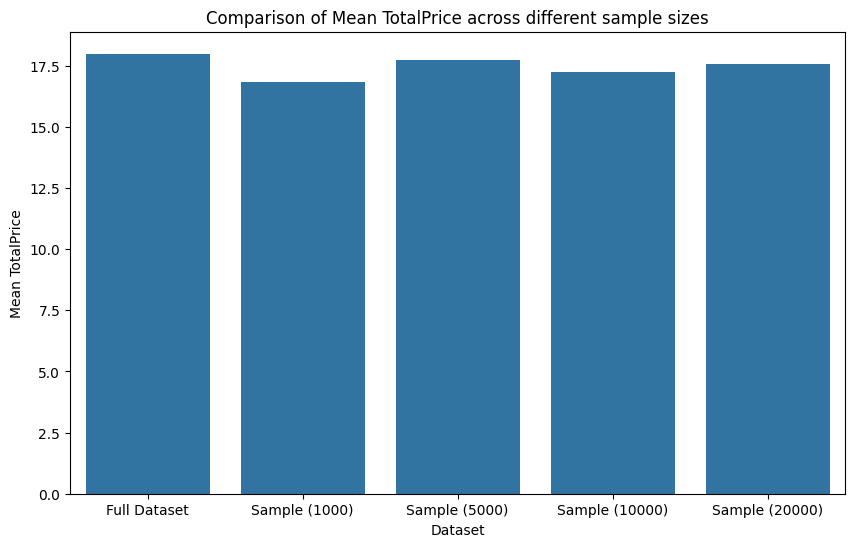

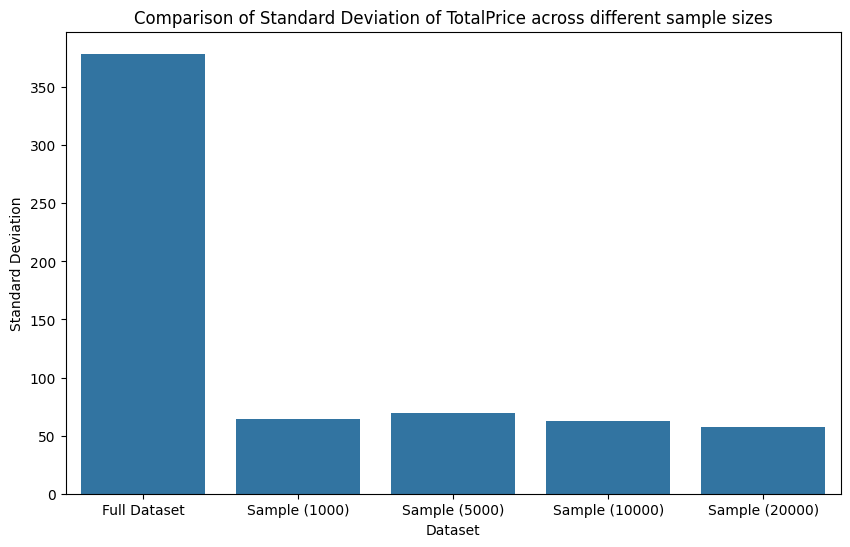

In [ ]:
# Sample with different sizes
sample_5000 = df.sample(n=5000, random_state=42)
sample_10000 = df.sample(n=10000, random_state=42)
sample_20000 = df.sample(n=20000, random_state=42)

# Calculate mean and standard deviation for each new sample
sample_5000_mean = sample_5000['TotalPrice'].mean()
sample_5000_std = sample_5000['TotalPrice'].std()

sample_10000_mean = sample_10000['TotalPrice'].mean()
sample_10000_std = sample_10000['TotalPrice'].std()

sample_20000_mean = sample_20000['TotalPrice'].mean()
sample_20000_std = sample_20000['TotalPrice'].std()

# Create a dictionary to store the results
results = {
    'Dataset': ['Full Dataset', 'Sample (1000)', 'Sample (5000)', 'Sample (10000)', 'Sample (20000)'],
    'Mean TotalPrice': [full_mean, sample_mean, sample_5000_mean, sample_10000_mean, sample_20000_mean],
    'Standard Deviation': [full_std, sample_std, sample_5000_std, sample_10000_std, sample_20000_std]
}

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results)

# Display the table
display(results_df)

# Create a bar chart to visualize the means
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Mean TotalPrice', data=results_df)
plt.title('Comparison of Mean TotalPrice across different sample sizes')
plt.ylabel('Mean TotalPrice')
plt.show()

# Create a bar chart to visualize the standard deviations
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Standard Deviation', data=results_df)
plt.title('Comparison of Standard Deviation of TotalPrice across different sample sizes')
plt.ylabel('Standard Deviation')
plt.show()

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [ ]:
# Find the top two countries with the most orders
top_countries = df['Country'].value_counts().nlargest(2).index.tolist()
print(f"Top two countries with the most orders: {top_countries}")

# Filter the dataframe to include only the data from the top two countries
df_top_countries = df[df['Country'].isin(top_countries)]

Top two countries with the most orders: ['United Kingdom', 'Germany']


In [ ]:
from scipy import stats

# Separate the TotalPrice data for the two top countries
country1_data = df_top_countries[df_top_countries['Country'] == top_countries[0]]['TotalPrice']
country2_data = df_top_countries[df_top_countries['Country'] == top_countries[1]]['TotalPrice']

# Perform independent samples t-test
ttest_result = stats.ttest_ind(country1_data, country2_data)

print(f"Independent Samples t-test results:")
print(f"  t-statistic: {ttest_result.statistic:.4f}")
print(f"  p-value: {ttest_result.pvalue:.4f}")

Independent Samples t-test results:
  t-statistic: -1.6839
  p-value: 0.0922


- t-통계량의 절대값이 클수록 두 표본 평균의 차이가 크다는 의미이고 음수가 나온 것은 두번째 독일표본의 평균이 첫번째 영국표본의 평균보다 더 큼을 의미(순서차이)

- p-값이 유의수준 0.05보다 크므로, 귀무가설(두 국가의 TotalPrice 평균간 차이는 없다)을 채택하고 대립가설(두 국가의 TotalPrice 평균간 차이가 있다)을 기각해야 함

- 따라서 유의수준 0.05 하에서는 주문량이 가장 많은 상위 두 국가인 영국과 독일의 'TotalPrice' 평균은 통계적으로 유의미한 차이가 있다고 보기 어려움

- 1종 오류는 실제로 귀무가설이 참인데도 귀무가설을 기각하는 오류이고 2종 오류는 대립가설이 참인데도 불구하고 귀무가설을 채택하는 오류인데, 현재 p-값이 유의수준 0.05보다 크므로 귀무가설을 채택한 상황에서는 대립가설이 참인데도 이를 발견하지 못했을 가능성이 있다면 2종 오류를 범할 수 가능성도 있음을 의미

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [ ]:
# Define weekdays and weekends (Monday=0, Sunday=6)
weekday_data = df[df['DayOfWeek'] <= 4]['UnitPrice']
weekend_data = df[df['DayOfWeek'] > 4]['UnitPrice']

# Calculate statistics for weekdays
weekday_stats = {
    'Mean': weekday_data.mean(),
    'Median': weekday_data.median(),
    'Standard Deviation': weekday_data.std(),
    'Variance': weekday_data.var(),
    'Quantiles': weekday_data.quantile([0.25, 0.5, 0.75]).to_dict()
}

# Calculate statistics for weekends
weekend_stats = {
    'Mean': weekend_data.mean(),
    'Median': weekend_data.median(),
    'Standard Deviation': weekend_data.std(),
    'Variance': weekend_data.var(),
    'Quantiles': weekend_data.quantile([0.25, 0.5, 0.75]).to_dict()
}

print("Weekday UnitPrice Statistics:")
for key, value in weekday_stats.items():
    print(f"  {key}: {value}")

print("\nWeekend UnitPrice Statistics:")
for key, value in weekend_stats.items():
    print(f"  {key}: {value}")

Weekday UnitPrice Statistics:
  Mean: 4.843425333065292
  Median: 2.1
  Standard Deviation: 103.03205776157508
  Variance: 10615.604926584541
  Quantiles: {0.25: 1.25, 0.5: 2.1, 0.75: 4.13}

Weekend UnitPrice Statistics:
  Mean: 2.8878244815533978
  Median: 1.85
  Standard Deviation: 7.959497387498285
  Variance: 63.353598661592024
  Quantiles: {0.25: 1.25, 0.5: 1.85, 0.75: 3.75}


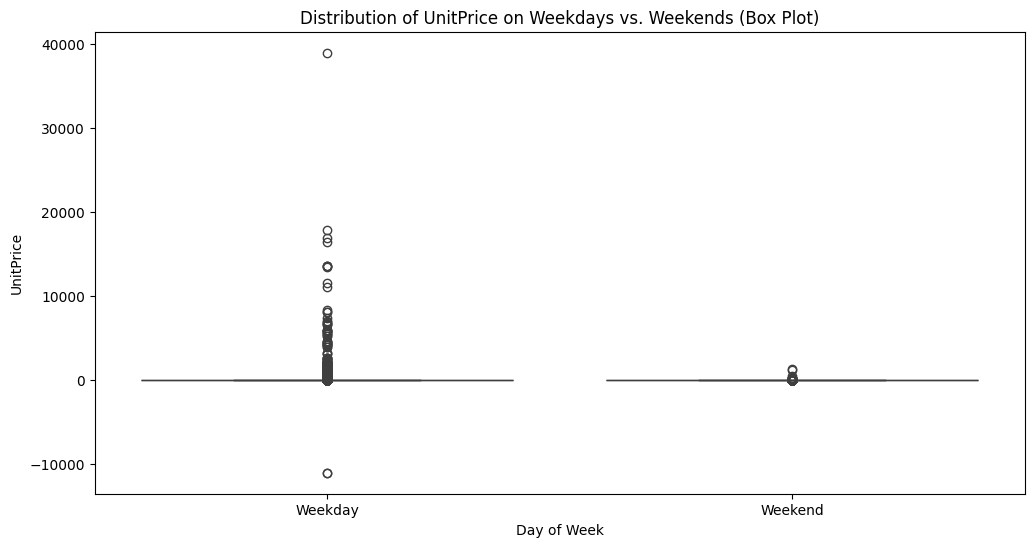

In [ ]:
# Create box plots for UnitPrice on weekdays and weekends
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['DayOfWeek'].apply(lambda x: 'Weekend' if x > 4 else 'Weekday'), y='UnitPrice', data=df)
plt.title('Distribution of UnitPrice on Weekdays vs. Weekends (Box Plot)')
plt.xlabel('Day of Week')
plt.ylabel('UnitPrice')
plt.show()

- 상자수염 그림에서 주중 및 주말 UnitPrice분포를 비교해보면  중앙값(선)과 산포도가 주말이 낮고 주중은 이상치 존재

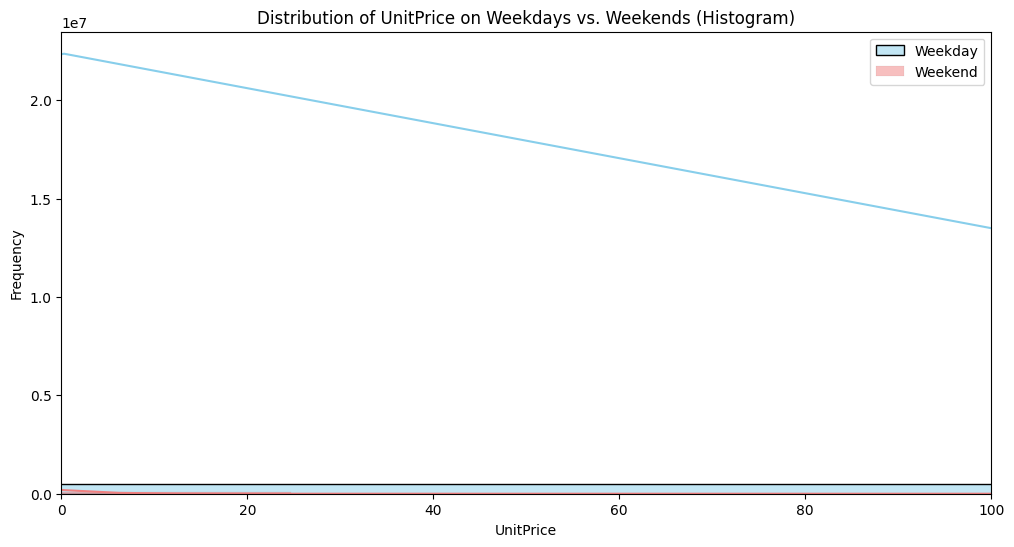

In [ ]:
# Create histograms for UnitPrice on weekdays and weekends
plt.figure(figsize=(12, 6))
sns.histplot(weekday_data, bins=50, color='skyblue', label='Weekday', kde=True)
sns.histplot(weekend_data, bins=50, color='lightcoral', label='Weekend', kde=True)
plt.title('Distribution of UnitPrice on Weekdays vs. Weekends (Histogram)')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 100) # Limit x-axis for better visualization of the main distribution
plt.show()

- 주중과 주말의 UnitPrice의 빈도(거래 수)분포를 나타내며 오른쪽으로 치우쳐진 이유는 가격이 낮은 거래가 더 많기 때문



## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Data Cleaning and Preparation
# Remove rows with missing CustomerID (as it's not used as a feature but might indicate incomplete transactions)
df_cleaned = df.dropna(subset=['CustomerID']).copy()

# Remove rows with negative Quantity or UnitPrice (these are likely returns or errors and not relevant for predicting sales quantity)
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)].copy()

# Handle outliers in UnitPrice and Quantity using IQR (optional but good practice for regression)
# For UnitPrice
Q1_price = df_cleaned['UnitPrice'].quantile(0.25)
Q3_price = df_cleaned['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price
df_cleaned = df_cleaned[~((df_cleaned['UnitPrice'] < (Q1_price - 1.5 * IQR_price)) | (df_cleaned['UnitPrice'] > (Q3_price + 1.5 * IQR_price)))].copy()

# For Quantity
Q1_quantity = df_cleaned['Quantity'].quantile(0.25)
Q3_quantity = df_cleaned['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
df_cleaned = df_cleaned[~((df_cleaned['Quantity'] < (Q1_quantity - 1.5 * IQR_quantity)) | (df_cleaned['Quantity'] > (Q3_quantity + 1.5 * IQR_quantity)))].copy()


# Feature Engineering (DayOfWeek and InvoiceMonth are already created)

# Select features and target
features = ['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']
target = 'Quantity'

X = df_cleaned[features]
y = df_cleaned[target]

# One-Hot Encode 'Country' (Categorical variable)
X = pd.get_dummies(X, columns=['Country'], drop_first=True)

# Convert boolean columns to integer type for statsmodels
for col in X.columns:
    if X[col].dtype == bool:
        X[col] = X[col].astype(int)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Get regression coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Using statsmodels to get more detailed summary (including p-values)
X_train_sm = sm.add_constant(X_train) # Add a constant for the intercept
model_sm = sm.OLS(y_train, X_train_sm).fit()
print("\nStatsmodels Summary:")
print(model_sm.summary())

Mean Squared Error (MSE): 38.63
Root Mean Squared Error (RMSE): 6.22
R-squared (R2): 0.16

Model Coefficients:
  UnitPrice: -1.5196
  DayOfWeek: -0.2759
  InvoiceMonth: -0.0832
  Country_Austria: -0.3722
  Country_Bahrain: -1.6817
  Country_Belgium: -0.3753
  Country_Brazil: 4.7358
  Country_Canada: -0.0282
  Country_Channel Islands: 0.7667
  Country_Cyprus: -2.9400
  Country_Czech Republic: 7.6606
  Country_Denmark: 3.6055
  Country_EIRE: 0.0611
  Country_European Community: -0.3778
  Country_Finland: 0.5084
  Country_France: -0.3064
  Country_Germany: 0.1213
  Country_Greece: 0.4160
  Country_Iceland: 0.0253
  Country_Israel: 1.9302
  Country_Italy: -0.0579
  Country_Japan: -1.9597
  Country_Lebanon: 0.1875
  Country_Lithuania: 5.1453
  Country_Malta: -1.8815
  Country_Netherlands: 0.7648
  Country_Norway: 1.9735
  Country_Poland: -0.2471
  Country_Portugal: -1.5757
  Country_RSA: -2.6237
  Country_Saudi Arabia: -2.2270
  Country_Singapore: 2.6049
  Country_Spain: -1.9650
  Country_S

- 회귀계수는 'coef'열에 있는 값들로 UnitPrice -1.5196의 의미는 모든 다른 요인이 일정할 때 상품단가가 1증가하면 판매수량은 평균 약 1.52로 감소함을 의미하며 이때 P값이 0.000으로 매우 적어 통계적으로 유의미함

- 요일값과 판매월의 경우도 가각 -0.2759, -0.0832로 1증가시 판매수량이 평균 0.28, 0.08로 감소하며 P값이 0.000으로 매우 적어 통계적으로 유의미

- 국가별로 판매수량은 알파벳순 기준국가 오스트리아와 비교시 단위 1증가시 다양한 증감수치 나타내며 P값도 0.05기준 다양하며 통계적으로 유의미/무의미(오스트리아보다 판매수량이 평균적으로 더 높거나 낮다는 사실의 통계적 판단) 공존

- 결정계수 값은 0.159로 4개 독립변수 상품단가, 요일값, 판매월, 국가가 종속변수 판매수량의 분산을 얼마나잘 설명하는지를 의미하며 0.159는 판매수량 전체변동의 15.9%만을 설명한다는 의미

- 따라서 개별 독립변수는 대체로(일부 국가 제외) P값이 적어 통계적으로 유의하나 결정계수가 매우 낮아서 판매수량 변동을 잘 설명한다고 볼 수 없음

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [40]:
# Create the 'IsReturn' feature: 1 if Quantity is negative, 0 otherwise
df['IsReturn'] = (df['Quantity'] < 0).astype(int)

# Clean the data for logistic regression
# Drop rows with missing CustomerID as they are incomplete transactions
df_cleaned_logistic = df.dropna(subset=['CustomerID']).copy()

# Drop rows with missing Description
df_cleaned_logistic = df_cleaned_logistic.dropna(subset=['Description']).copy()

# Select features for the logistic regression model
# Include CustomerID and StockCode for merging new features
features_logistic = ['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth', 'IsReturn', 'CustomerID', 'StockCode']
df_cleaned_logistic = df_cleaned_logistic[features_logistic].copy()

# Display the first few rows and information of the prepared dataframe
display(df_cleaned_logistic.head())
df_cleaned_logistic.info()

,UnitPrice,Country,DayOfWeek,InvoiceMonth,IsReturn,CustomerID,StockCode
0,2.55,United Kingdom,2,12,0,17850.0,85123A
1,3.39,United Kingdom,2,12,0,17850.0,71053
2,2.75,United Kingdom,2,12,0,17850.0,84406B
3,3.39,United Kingdom,2,12,0,17850.0,84029G
4,3.39,United Kingdom,2,12,0,17850.0,84029E


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UnitPrice     406829 non-null  float64
 1   Country       406829 non-null  object 
 2   DayOfWeek     406829 non-null  int32  
 3   InvoiceMonth  406829 non-null  int32  
 4   IsReturn      406829 non-null  int64  
 5   CustomerID    406829 non-null  float64
 6   StockCode     406829 non-null  object 
dtypes: float64(2), int32(2), int64(1), object(2)
memory usage: 21.7+ MB


In [32]:
from sklearn.model_selection import train_test_split

# Select features (X) and target (y) for logistic regression
X_logistic = df_cleaned_logistic.drop('IsReturn', axis=1)
y_logistic = df_cleaned_logistic['IsReturn']

# One-Hot Encode 'Country' (Categorical variable) for the logistic model
X_logistic = pd.get_dummies(X_logistic, columns=['Country'], drop_first=True)

# Convert boolean columns to integer type if necessary (for compatibility with some models)
for col in X_logistic.columns:
    if X_logistic[col].dtype == bool:
        X_logistic[col] = X_logistic[col].astype(int)


# Split data into training and testing sets for logistic regression
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic, y_logistic, test_size=0.2, random_state=42, stratify=y_logistic # Stratify to maintain the proportion of returns in both sets
)

print("Logistic Regression Data Split:")
print(f"  X_train_logistic shape: {X_train_logistic.shape}")
print(f"  X_test_logistic shape: {X_test_logistic.shape}")
print(f"  y_train_logistic shape: {y_train_logistic.shape}")
print(f"  y_test_logistic shape: {y_test_logistic.shape}")

Logistic Regression Data Split:
  X_train_logistic shape: (325463, 39)
  X_test_logistic shape: (81366, 39)
  y_train_logistic shape: (325463,)
  y_test_logistic shape: (81366,)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Select features (X) and target (y) for logistic regression
X_logistic = df_cleaned_logistic.drop('IsReturn', axis=1)
y_logistic = df_cleaned_logistic['IsReturn']

# One-Hot Encode 'Country' (Categorical variable) for the logistic model
X_logistic = pd.get_dummies(X_logistic, columns=['Country'], drop_first=True)

# Convert boolean columns to integer type if necessary (for compatibility with some models)
for col in X_logistic.columns:
    if X_logistic[col].dtype == bool:
        X_logistic[col] = X_logistic[col].astype(int)


# Split data into training and testing sets for logistic regression
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic, y_logistic, test_size=0.2, random_state=42, stratify=y_logistic # Stratify to maintain the proportion of returns in both sets
)

print("Logistic Regression Data Split:")
print(f"  X_train_logistic shape: {X_train_logistic.shape}")
print(f"  X_test_logistic shape: {X_test_logistic.shape}")
print(f"  y_train_logistic shape: {y_train_logistic.shape}")
print(f"  y_test_logistic shape: {y_test_logistic.shape}")

# Train the Logistic Regression Model
model_logistic = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model_logistic.fit(X_train_logistic, y_train_logistic)

print("\nLogistic Regression Model Training Complete.")

# Evaluate the model
y_pred_logistic = model_logistic.predict(X_test_logistic)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic)
recall = recall_score(y_test_logistic, y_pred_logistic)
f1 = f1_score(y_test_logistic, y_pred_logistic)

print("\nModel Evaluation:")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Logistic Regression Data Split:
  X_train_logistic shape: (325463, 39)
  X_test_logistic shape: (81366, 39)
  y_train_logistic shape: (325463,)
  y_test_logistic shape: (81366,)

Logistic Regression Model Training Complete.

Model Evaluation:
Confusion Matrix:
[[79579     6]
 [ 1777     4]]
Accuracy: 0.9781
Precision: 0.4000
Recall: 0.0022
F1-Score: 0.0045


- 모델 평가 결과 혼동행렬 값이 TN(실제 반품아님을 바르게 예측)은 79579, FP(실제반품 아님을 반품으로 잘못 예측_1종 오류)은 6, FN(실제반품을 반품아니라 잘못 예측_2종 오류)은 1777, TP(실제 반품을 반품으로 잘 예측)4로 나왔고 1종오류 수치가 높아 좋은 모델이라 판단하기 어려워 보임

- 정확도는 전체 예측 중 바르게 예측한 비율로 97.81%로 높아 보이나 본래 데이터 대부분이 반품이 아니므로 정확도만으로는 판단이 어려워 보임

- 정밀도는 반품이라 예측한 것 중 실제 반품인 비율로 40%이므로 예측력이 낮아 좋은 모델이라 판단이 어려워 보임

- 재현율은 실제 반품 중에서 모델이 반품이라고 바르게 예측한 비율인데 0.22%로 매우 낮아 역시 모델 예측력이 매우 떨어져 보임

- F1-Score는 정밀도와 재현율의 조화평균인데 이 역시 0.45%로 매우 낮아 모델 성능이 낮음을 나타내고 있음

- 데이터셋 자체가 반품거래보다 일반거래가 훨씬 많기 때문에 모델이 실제 반품 거래를 거의 식별하지 못하고 있어서 모델의 성능을 올리려면 1) 데이터 불균형을 해소하는 기법을 적용하거나, 2) 모델의 예측력을 높일 추가적인 피처를 더 만들거나 3) 로지스틱 회귀 외에 불균형 데이터 처리에 더 효과적인 분류모델을 시도해 볼 수 있음




1. 데이터불균형 해소를 위한 오버샘플링 적용

In [36]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the distribution of the target variable before SMOTE
print("Distribution of 'IsReturn' before SMOTE:", Counter(y_train_logistic))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_logistic_smote, y_train_logistic_smote = smote.fit_resample(X_train_logistic, y_train_logistic)

# Check the distribution of the target variable after SMOTE
print("Distribution of 'IsReturn' after SMOTE:", Counter(y_train_logistic_smote))

Distribution of 'IsReturn' before SMOTE: Counter({0: 318339, 1: 7124})
Distribution of 'IsReturn' after SMOTE: Counter({0: 318339, 1: 318339})


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Train the Logistic Regression Model using the SMOTE-balanced training data
model_logistic_smote = LogisticRegression(max_iter=1000)
model_logistic_smote.fit(X_train_logistic_smote, y_train_logistic_smote)

print("Logistic Regression Model Training with SMOTE Complete.")

# Evaluate the model on the original, unbalanced test data
y_pred_logistic_smote = model_logistic_smote.predict(X_test_logistic)

# Calculate evaluation metrics
conf_matrix_smote = confusion_matrix(y_test_logistic, y_pred_logistic_smote)
accuracy_smote = accuracy_score(y_test_logistic, y_pred_logistic_smote)
precision_smote = precision_score(y_test_logistic, y_pred_logistic_smote)
recall_smote = recall_score(y_test_logistic, y_pred_logistic_smote)
f1_smote = f1_score(y_test_logistic, y_pred_logistic_smote)

print("\nModel Evaluation (after SMOTE):")
print("Confusion Matrix:")
print(conf_matrix_smote)
print(f"Accuracy: {accuracy_smote:.4f}")
print(f"Precision: {precision_smote:.4f}")
print(f"Recall: {recall_smote:.4f}")
print(f"F1-Score: {f1_smote:.4f}")

Logistic Regression Model Training with SMOTE Complete.

Model Evaluation (after SMOTE):
Confusion Matrix:
[[53929 25656]
 [  916   865]]
Accuracy: 0.6734
Precision: 0.0326
Recall: 0.4857
F1-Score: 0.0611


In [35]:
!pip install imblearn

- 불균형 해소를 위해 오버샘플링을 적용해 반품 데이터를 증강했지만 여전히 수치적으로 예측 성능이 낮음

2. 새로운 피처 추가 적용

In [41]:
# Create new features related to customer and product behavior

# Customer Purchase Count
# Group by CustomerID and count the number of unique InvoiceNo for each customer
customer_purchase_count = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_purchase_count.rename(columns={'InvoiceNo': 'CustomerPurchaseCount'}, inplace=True)

# Product Avg Quantity
# Group by StockCode and calculate the mean of the absolute Quantity
# Using absolute quantity to include both sales and returns in the average consideration
product_avg_quantity = df.groupby('StockCode')['Quantity'].apply(lambda x: abs(x).mean()).reset_index()
product_avg_quantity.rename(columns={'Quantity': 'ProductAvgQuantity'}, inplace=True)


# Product Return Rate
# Calculate the total number of transactions for each product
product_total_transactions = df.groupby('StockCode').size().reset_index(name='TotalTransactions')

# Calculate the number of return transactions for each product
product_returns = df[df['IsReturn'] == 1].groupby('StockCode').size().reset_index(name='ReturnTransactions')

# Merge total transactions and return transactions
product_return_rate_df = pd.merge(product_total_transactions, product_returns, on='StockCode', how='left').fillna(0)

# Calculate ProductReturnRate
product_return_rate_df['ProductReturnRate'] = product_return_rate_df['ReturnTransactions'] / product_return_rate_df['TotalTransactions']

# Select relevant columns for merging
product_return_rate_df = product_return_rate_df[['StockCode', 'ProductReturnRate']]

# Merge the new features back to the original cleaned logistic dataframe
# Use the original df to merge as df_cleaned_logistic was already subsetted
df_logistic_with_features = pd.merge(df_cleaned_logistic, customer_purchase_count, on='CustomerID', how='left')
df_logistic_with_features = pd.merge(df_logistic_with_features, product_avg_quantity, on='StockCode', how='left')
df_logistic_with_features = pd.merge(df_logistic_with_features, product_return_rate_df, on='StockCode', how='left').fillna(0) # Fill NaN for products with no returns


# Drop rows where CustomerID was NaN initially (these were already removed in df_cleaned_logistic, but re-merging with df might bring them back)
df_logistic_with_features = df_logistic_with_features.dropna(subset=['CustomerID']).copy()


# Display the first few rows with new features
display(df_logistic_with_features.head())

# Display information to check for missing values after merging
df_logistic_with_features.info()

,UnitPrice,Country,DayOfWeek,InvoiceMonth,IsReturn,CustomerID,StockCode,CustomerPurchaseCount,ProductAvgQuantity,ProductReturnRate
0,2.55,United Kingdom,2,12,0,17850.0,85123A,35,19.238219,0.018591
1,3.39,United Kingdom,2,12,0,17850.0,71053,35,5.602817,0.025352
2,2.75,United Kingdom,2,12,0,17850.0,84406B,35,8.817568,0.030405
3,3.39,United Kingdom,2,12,0,17850.0,84029G,35,7.630802,0.008439
4,3.39,United Kingdom,2,12,0,17850.0,84029E,35,10.831858,0.017699


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   UnitPrice              406829 non-null  float64
 1   Country                406829 non-null  object 
 2   DayOfWeek              406829 non-null  int32  
 3   InvoiceMonth           406829 non-null  int32  
 4   IsReturn               406829 non-null  int64  
 5   CustomerID             406829 non-null  float64
 6   StockCode              406829 non-null  object 
 7   CustomerPurchaseCount  406829 non-null  int64  
 8   ProductAvgQuantity     406829 non-null  float64
 9   ProductReturnRate      406829 non-null  float64
dtypes: float64(4), int32(2), int64(2), object(2)
memory usage: 27.9+ MB


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter

# Select features (X) and target (y) for logistic regression with new features
# Exclude CustomerID and StockCode from features
features_logistic_new = ['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth',
                         'CustomerPurchaseCount', 'ProductAvgQuantity', 'ProductReturnRate']
target_logistic = 'IsReturn'

X_logistic_new = df_logistic_with_features[features_logistic_new].copy()
y_logistic_new = df_logistic_with_features[target_logistic].copy()

# One-Hot Encode 'Country' (Categorical variable)
X_logistic_new = pd.get_dummies(X_logistic_new, columns=['Country'], drop_first=True)

# Convert boolean columns to integer type
for col in X_logistic_new.columns:
    if X_logistic_new[col].dtype == bool:
        X_logistic_new[col] = X_logistic_new[col].astype(int)

# Split data into training and testing sets
X_train_logistic_new, X_test_logistic_new, y_train_logistic_new, y_test_logistic_new = train_test_split(
    X_logistic_new, y_logistic_new, test_size=0.2, random_state=42, stratify=y_logistic_new
)

print("Logistic Regression Data Split (with new features):")
print(f"  X_train_logistic_new shape: {X_train_logistic_new.shape}")
print(f"  X_test_logistic_new shape: {X_test_logistic_new.shape}")
print(f"  y_train_logistic_new shape: {y_train_logistic_new.shape}")
print(f"  y_test_logistic_new shape: {y_test_logistic_new.shape}")

# Apply SMOTE to the training data (optional, based on previous results)
# Check the distribution of the target variable before SMOTE
print("\nDistribution of 'IsReturn' before SMOTE (with new features):", Counter(y_train_logistic_new))

smote = SMOTE(random_state=42)
X_train_logistic_new_smote, y_train_logistic_new_smote = smote.fit_resample(X_train_logistic_new, y_train_logistic_new)

# Check the distribution of the target variable after SMOTE
print("Distribution of 'IsReturn' after SMOTE (with new features):", Counter(y_train_logistic_new_smote))


# Train the Logistic Regression Model using the SMOTE-balanced training data with new features
model_logistic_new_smote = LogisticRegression(max_iter=1000)
model_logistic_new_smote.fit(X_train_logistic_new_smote, y_train_logistic_new_smote)

print("\nLogistic Regression Model Training with SMOTE and new features Complete.")

# Evaluate the model on the original, unbalanced test data with new features
y_pred_logistic_new_smote = model_logistic_new_smote.predict(X_test_logistic_new)

# Calculate evaluation metrics
conf_matrix_new_smote = confusion_matrix(y_test_logistic_new, y_pred_logistic_new_smote)
accuracy_new_smote = accuracy_score(y_test_logistic_new, y_pred_logistic_new_smote)
precision_new_smote = precision_score(y_test_logistic_new, y_pred_logistic_new_smote)
recall_new_smote = recall_score(y_test_logistic_new, y_pred_logistic_new_smote)
f1_new_smote = f1_score(y_test_logistic_new, y_pred_logistic_new_smote)

print("\nModel Evaluation (after SMOTE and with new features):")
print("Confusion Matrix:")
print(conf_matrix_new_smote)
print(f"Accuracy: {accuracy_new_smote:.4f}")
print(f"Precision: {precision_new_smote:.4f}")
print(f"Recall: {recall_new_smote:.4f}")
print(f"F1-Score: {f1_new_smote:.4f}")

Logistic Regression Data Split (with new features):
  X_train_logistic_new shape: (325463, 42)
  X_test_logistic_new shape: (81366, 42)
  y_train_logistic_new shape: (325463,)
  y_test_logistic_new shape: (81366,)

Distribution of 'IsReturn' before SMOTE (with new features): Counter({0: 318339, 1: 7124})
Distribution of 'IsReturn' after SMOTE (with new features): Counter({0: 318339, 1: 318339})

Logistic Regression Model Training with SMOTE and new features Complete.

Model Evaluation (after SMOTE and with new features):
Confusion Matrix:
[[65678 13907]
 [  860   921]]
Accuracy: 0.8185
Precision: 0.0621
Recall: 0.5171
F1-Score: 0.1109


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 재현율이 조금 향상되어 보이지만 여전히 정밀도는 6.21%로 매우 낮아 반품 아닌 거래를 반품이라고 예측하는 경우가 많음을 의미해 예측 성능이 여전히 낮음

3. 다른 모델(Random Forest) 시도

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Train the Random Forest Model using the SMOTE-balanced training data
# You might need to adjust n_estimators and other parameters for better performance
model_rf_smote = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # Added class_weight for potentially better handling of imbalance

# Using the SMOTE-balanced data
model_rf_smote.fit(X_train_logistic_new_smote, y_train_logistic_new_smote)

print("Random Forest Model Training with SMOTE Complete.")

# Evaluate the model on the original, unbalanced test data
y_pred_rf_smote = model_rf_smote.predict(X_test_logistic_new)

# Calculate evaluation metrics
conf_matrix_rf_smote = confusion_matrix(y_test_logistic_new, y_pred_rf_smote)
accuracy_rf_smote = accuracy_score(y_test_logistic_new, y_pred_rf_smote)
precision_rf_smote = precision_score(y_test_logistic_new, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test_logistic_new, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test_logistic_new, y_pred_rf_smote)

print("\nRandom Forest Model Evaluation (after SMOTE and with new features):")
print("Confusion Matrix:")
print(conf_matrix_rf_smote)
print(f"Accuracy: {accuracy_rf_smote:.4f}")
print(f"Precision: {precision_rf_smote:.4f}")
print(f"Recall: {recall_rf_smote:.4f}")
print(f"F1-Score: {f1_rf_smote:.4f}")

Random Forest Model Training with SMOTE Complete.

Random Forest Model Evaluation (after SMOTE and with new features):
Confusion Matrix:
[[77951  1634]
 [ 1453   328]]
Accuracy: 0.9621
Precision: 0.1672
Recall: 0.1842
F1-Score: 0.1753


- 정확도, 정밀도,  F-1 Score 값은 그동안 과정과 비교하면  높게 나와 상대적으로 더 나은 성능을 가진다고 보여지나 재현율이 51.7%에서 급감해 실제 반품 거래를 많이 놓치고 있음을 보여줌

- 덧글 : 사실 Gemini의 코딩 내용과 결과를 해석하기만도 낯설고 어려운지라 계속 성능을 높이는 방법들을 제안해주겠지만 많은 시간이 걸릴 듯해 역시 배우고 알아야 노련하게 해결하겠구나 새삼 깨달았습니다(몰라도 코딩 다 시켜서 결과를 뽑으면 되지 않을까 싶지만 시킬 줄도 잘 알아야 하고 해석도 잘 할 수 있어야 겠구나 싶습니다....갈 길이 먼...)